# Create synthetic data from wine dataset

In [16]:
!pip install s3fs
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 24.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 24.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [19]:
import pandas
import os
import s3fs
import random
import sklearn.model_selection

## Load Data

In [3]:
AWS_ACCESS_KEY_ID = os.environ['AWS_ACCESS_KEY_ID']
AWS_SECRET_ACCESS_KEY = os.environ['AWS_SECRET_ACCESS_KEY']
AWS_S3_ENDPOINT = os.environ['AWS_S3_ENDPOINT']
AWS_S3_BUCKET = os.environ['AWS_S3_BUCKET']

In [4]:
def read_data(datasrc):
    data = pandas.read_csv(
        "s3://" + AWS_S3_BUCKET + "/" + datasrc, sep=';',
        storage_options={
            "key": AWS_ACCESS_KEY_ID,
            "secret": AWS_SECRET_ACCESS_KEY,
            "endpoint_url": AWS_S3_ENDPOINT,
        }
    )
    return data

In [5]:
input_files = ['winequality-red.csv', 'winequality-white.csv']

wine = {}

for input_file in input_files:
    wine[input_file] = read_data(input_file)

In [6]:
for key in wine:
    print(wine[key])
    

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Create two different population datasets
From the original wine datasets we will create two different population datasets, one with a similar mean and sdev to the orignal, and one with a negative skew and increased mean. We divide these datasets into separate training and inference datasets.


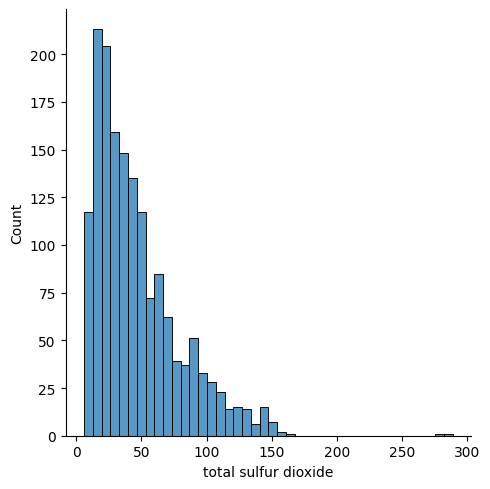

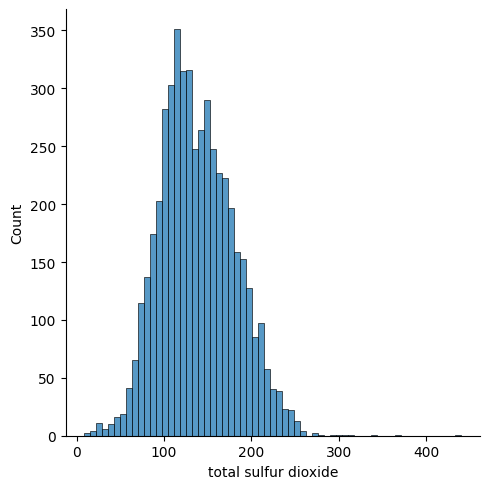

In [6]:
import seaborn as sns
for input_file in wine:
    sns.displot(wine[input_file]["total sulfur dioxide"], kde=False)

OK, let's start by creating two datasets from the original sample data. Dataset A will look like the original, and dataset B will be skewed, which means it will be statistically different.

In [22]:
# synthetic_wine_a_train = {}
# synthetic_wine_a_infer = {}
# synthetic_wine_b_train = {}
# synthetic_wine_b_infer = {}



synthetic_wine_a = {}
synthetic_wine_b = {}

# loop over the input files (white and red wine)
for input_file in wine:
    # synthetic_wine_a["syn-" + input_file] = pandas.DataFrame()
    # synthetic_wine_b_train["syn-" + input_file] = pandas.DataFrame()
    # synthetic_wine_b_infer["syn-" + input_file] = pandas.DataFrame()

    sdev = wine[input_file].std(axis=0)
    # mean = wine[input_file].mean(axis=0)

#     for column in wine[input_file].columns:
#         synthetic_wine_a["syn-" + input_file][column] = wine[input_file][column] * (1 + sdev[column] * random.uniform(-0.05, 0.05))
#         synthetic_wine_b["syn-" + input_file][column] = wine[input_file][column] * (1 + sdev[column] * random.uniform(0.0, 0.1))
    
    # print(input_file)
    # print(synthetic_wine_a_train["syn-" + input_file].info)
    # print(wine[input_file].std(axis=0))
    
    syn_a = []
    syn_b = []
    
    syn_data_a = pandas.DataFrame()
    syn_data_b = pandas.DataFrame()
    
    # Let's create datasets that is 1000 times bigger than the original
    for _ in range(1000):  
        for column in wine[input_file].columns:
                # The A dataset simply has the sdev randomly varied up to +/- 5%
                syn_data_a[column] = wine[input_file][column] * (1 + sdev[column] * random.uniform(-0.05, 0.05))
                # The A dataset has the sdev randomly varied up to +10%
                syn_data_b[column] = wine[input_file][column] * (1 + sdev[column] * random.uniform(0.0, 0.1))
        syn_a.append(syn_data_a)
        syn_b.append(syn_data_b)
    
    synthetic_wine_a["syn-" + input_file] = pandas.concat(syn_a, ignore_index=True)
    synthetic_wine_b["syn-" + input_file] = pandas.concat(syn_a, ignore_index=True)
    # print(synthetic_wine_a_train["syn-" + input_file].info)
    # print(synthetic_wine_b_train["syn-" + input_file].info)
            
    
    # let's split the A and B dataset into training and inference data
    synthetic_wine_a_train["syn-" + input_file], synthetic_wine_a_infer["syn-" + input_file] = \
    sklearn.model_selection.train_test_split(synthetic_wine_a["syn-" + input_file], 0.01, random_state=123)
        
        
    
    
    
#     synthetic_wine_a_infer["syn-" + input_file] = pandas.concat(syn_a)
#     synthetic_wine_b_infer["syn-" + input_file] = pandas.concat(syn_b)      
                
#   #  print(synthetic_wine_a_train["syn-" + input_file].info)
#     print(synthetic_wine_a_infer["syn-" + input_file].info)
    
    

TypeError: Singleton array array(0.01) cannot be considered a valid collection.

In [30]:
    # let's split the A and B dataset into training and inference data
    synthetic_wine_a_train = {}
    synthetic_wine_a_infer = {}
    synthetic_wine_b_train = {}
    synthetic_wine_b_infer = {}
    
    synthetic_wine_a_train["syn-" + input_file], synthetic_wine_a_infer["syn-" + input_file] = \
    sklearn.model_selection.train_test_split(synthetic_wine_a["syn-" + input_file], test_size=0.01, random_state=123)
    
    synthetic_wine_b_train["syn-" + input_file], synthetic_wine_b_infer["syn-" + input_file] = \
    sklearn.model_selection.train_test_split(synthetic_wine_b["syn-" + input_file], test_size=0.01, random_state=123)
    
    print(synthetic_wine_a_infer["syn-" + input_file].info)

<bound method DataFrame.info of          fixed acidity  volatile acidity  citric acid  residual sugar  \
273691        7.543280          0.516898     0.029822        1.717733   
806932        7.166116          0.308151     0.337984        2.526078   
209257        6.977534          0.636183     0.069585        1.818776   
1569696       8.109026          0.367793     0.646146        6.466759   
436191        7.731862          0.775347     0.000000        2.222948   
...                ...               ...          ...             ...   
1261636       5.940333          0.387674     0.159051        1.414603   
580636        6.506079          1.083498     0.059644        2.121905   
486600        9.900556          0.238568     0.417510        1.818776   
248346        9.806265          0.437375     0.725672        6.618323   
962871        7.920444          0.710735     0.198814        2.425034   

         chlorides  free sulfur dioxide  total sulfur dioxide  density  \
273691    0.07003

In [9]:
for _ in synthetic_wine_a.keys():
    print(synthetic_wine_a[_].info)

<bound method DataFrame.info of          fixed acidity  volatile acidity  citric acid  residual sugar  \
0             7.956901          0.702457     0.000000        1.808405   
1             8.387004          0.883089     0.000000        2.474659   
2             8.387004          0.762668     0.040048        2.189122   
3            12.042877          0.280983     0.560673        1.808405   
4             7.956901          0.702457     0.000000        1.808405   
...                ...               ...          ...             ...   
1598995       6.666593          0.602106     0.080096        1.903584   
1598996       6.344016          0.551931     0.100120        2.093943   
1598997       6.774118          0.511790     0.130156        2.189122   
1598998       6.344016          0.647264     0.120144        1.903584   
1598999       6.451541          0.311088     0.470565        3.426451   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
0         0.0758